# Cluster Analysis.

## Import required packages.

In [22]:
from pathlib import Path

import os 
os.environ["OMP_NUM_THREADS"] = "1" # This is done to set 
# OMP_NUM_THREADS to 1 for comparison of various k in 
# k-Means clustering.

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import pairwise
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy


from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from pandas.plotting import parallel_coordinates

%matplotlib inline
import matplotlib.pylab as plt

## Load data set and perform data cleansing.

In [23]:
# Create data frame for marketing data set.
main_df = pd.read_csv('marketing_data.csv')

# Set row names (index) to 'Income', which is main_df column name. 
main_df.set_index('Income_Range', inplace=True)

# Display records of main_df data frame.
main_df

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Income_Range,,,,,,,,,,,,
1730.0 - 24206.0,10610,61581,5250,37677,8082,5909,9430,529,927,626,1279,1172
24221.0 - 32218.0,10663,68050,5648,34249,7982,5977,9285,519,826,529,1270,1230
32233.0 - 38361.0,11589,68492,5511,34996,7947,5892,8971,493,862,592,1320,1183
38361.0 - 44931.0,10950,71793,6197,42114,8839,6746,11634,524,953,694,1313,1164
44953.0 - 51717.0,11000,74962,6438,42956,9757,6440,11271,495,914,664,1308,1110
51766.0 - 58821.0,11695,69208,5328,34033,7671,5906,9378,535,919,536,1290,1225
58917.0 - 65526.0,10832,64578,6293,33367,8268,5658,8863,562,923,554,1283,1263
65569.0 - 72159.0,10781,65451,5802,37744,7644,6024,8565,535,938,565,1348,1218
72190.0 - 80573.0,11095,72596,6698,41560,9789,6999,10632,486,963,659,1314,1141


In [24]:
# To remove ‘Recency’ variables from the main_df data frame
main_df=main_df.drop(["Recency"], axis=1)
main_df.columns

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth'],
      dtype='object')

In [25]:
# View data types
main_df.dtypes

MntWines               int64
MntFruits              int64
MntMeatProducts        int64
MntFishProducts        int64
MntSweetProducts       int64
MntGoldProds           int64
NumDealsPurchases      int64
NumWebPurchases        int64
NumCatalogPurchases    int64
NumStorePurchases      int64
NumWebVisitsMonth      int64
dtype: object

In [26]:
# Rename the columns
main_df.columns = ['Wine_Expenses', 'Fruit_Expenses', 'Meat_Expenses', 'Fish_Expenses', 'Sweet_Expenses', 'Gold_Expenses', 'Discount_Purchases', 'Web_Purchases', 'Catalog_Purchases', 'Store_Purchases', 'Web_Visits_Monthly']
main_df

,Wine_Expenses,Fruit_Expenses,Meat_Expenses,Fish_Expenses,Sweet_Expenses,Gold_Expenses,Discount_Purchases,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits_Monthly
Income_Range,,,,,,,,,,,
1730.0 - 24206.0,61581,5250,37677,8082,5909,9430,529,927,626,1279,1172
24221.0 - 32218.0,68050,5648,34249,7982,5977,9285,519,826,529,1270,1230
32233.0 - 38361.0,68492,5511,34996,7947,5892,8971,493,862,592,1320,1183
38361.0 - 44931.0,71793,6197,42114,8839,6746,11634,524,953,694,1313,1164
44953.0 - 51717.0,74962,6438,42956,9757,6440,11271,495,914,664,1308,1110
51766.0 - 58821.0,69208,5328,34033,7671,5906,9378,535,919,536,1290,1225
58917.0 - 65526.0,64578,6293,33367,8268,5658,8863,562,923,554,1283,1263
65569.0 - 72159.0,65451,5802,37744,7644,6024,8565,535,938,565,1348,1218
72190.0 - 80573.0,72596,6698,41560,9789,6999,10632,486,963,659,1314,1141


In [27]:
#Check the missing values
def missing_data(main_df):
    total = main_df.isnull().sum().sort_values(ascending = False)
    Percentage = (main_df.isnull().sum()/main_df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(main_df).style.background_gradient(cmap='Greys')

,Total,Percentage
Wine_Expenses,0,0.000000
Fruit_Expenses,0,0.000000
Meat_Expenses,0,0.000000
Fish_Expenses,0,0.000000
Sweet_Expenses,0,0.000000
Gold_Expenses,0,0.000000
Discount_Purchases,0,0.000000
Web_Purchases,0,0.000000
Catalog_Purchases,0,0.000000
Store_Purchases,0,0.000000


In [28]:
main_df.describe()

,Wine_Expenses,Fruit_Expenses,Meat_Expenses,Fish_Expenses,Sweet_Expenses,Gold_Expenses,Discount_Purchases,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits_Monthly
count,10.000,10.000,10.000,10.000,10.000,10.000,10.00,10.000,10.000,10.000,10.000
mean,68081.600,5891.700,37396.800,8405.700,6062.100,9860.900,520.80,915.000,596.300,1297.000,1190.900
std,4218.989,490.378,3627.513,793.607,549.879,1078.145,23.37,41.274,60.213,29.435,45.885
min,61581.000,5250.000,33367.000,7644.000,5070.000,8565.000,486.00,826.000,529.000,1245.000,1110.000
25%,64796.250,5545.250,34435.750,7955.750,5895.500,9049.500,501.00,915.250,546.500,1280.000,1166.000
50%,68271.000,5777.000,36474.500,8080.000,5943.000,9404.000,526.50,924.000,578.500,1299.000,1193.000
75%,71146.750,6269.000,40606.000,8696.250,6336.000,10619.000,533.75,935.250,650.750,1313.750,1223.250
max,74962.000,6698.000,42956.000,9789.000,6999.000,11634.000,562.00,963.000,694.000,1348.000,1263.000


## Compute distance matrix.

In [29]:
# Compute Euclidean distance matrix, metric='euclidean'.
# d = pairwise.pairwise_distances(main_df, metric='euclidean')
d_round = np.round(pairwise.pairwise_distances(main_df, metric='euclidean'), 
          decimals=2)

# Display distance matrix for main_df data frame. 
pd.DataFrame(d_round, columns=main_df.index, index=main_df.index).head()

Income_Range,1730.0 - 24206.0,24221.0 - 32218.0,32233.0 - 38361.0,38361.0 - 44931.0,44953.0 - 51717.0,51766.0 - 58821.0,58917.0 - 65526.0,65569.0 - 72159.0,72190.0 - 80573.0,80573.0 - 666666.0
Income_Range,,,,,,,,,,
1730.0 - 24206.0,0.00,7335.96,7433.40,11445.81,14656.56,8463.97,5392.55,4031.15,12002.41,3800.25
24221.0 - 32218.0,7335.96,0.00,943.31,9113.88,11470.10,1268.78,3691.00,4432.69,9021.65,4375.02
32233.0 - 38361.0,7433.40,943.31,0.00,8406.53,10722.01,1313.91,4332.63,4143.45,8290.46,4761.87
38361.0 - 44931.0,11445.81,9113.88,8406.53,0.00,3447.31,8940.35,11738.67,8418.02,1782.28,10518.78
44953.0 - 51717.0,14656.56,11470.10,10722.01,3447.31,0.00,11054.96,14438.32,11402.37,2887.85,13512.61


## Normilize input variables and compute nomalized distance matrix. 

In [30]:
# To normalize the input variables using Pandas
main_df_norm = (main_df - main_df.mean())/main_df.std()
main_df_norm_round = np.round((main_df - main_df.mean())/main_df.std(), 
                          decimals=2)

# Display records of main_df data frame.
print('Normalized Input Variables for Five Income Ranges')
main_df_norm_round.head()

Normalized Input Variables for Five Income Ranges


,Wine_Expenses,Fruit_Expenses,Meat_Expenses,Fish_Expenses,Sweet_Expenses,Gold_Expenses,Discount_Purchases,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits_Monthly
Income_Range,,,,,,,,,,,
1730.0 - 24206.0,-1.54,-1.31,0.08,-0.41,-0.28,-0.40,0.35,0.29,0.49,-0.61,-0.41
24221.0 - 32218.0,-0.01,-0.50,-0.87,-0.53,-0.15,-0.53,-0.08,-2.16,-1.12,-0.92,0.85
32233.0 - 38361.0,0.10,-0.78,-0.66,-0.58,-0.31,-0.83,-1.19,-1.28,-0.07,0.78,-0.17
38361.0 - 44931.0,0.88,0.62,1.30,0.55,1.24,1.64,0.14,0.92,1.62,0.54,-0.59
44953.0 - 51717.0,1.63,1.11,1.53,1.70,0.69,1.31,-1.10,-0.02,1.12,0.37,-1.76


In [31]:
# Compute normalized distance between income ranges based on 'Gold_Expenses' and 
# 'Store_Purchases' variables. 
d_norm_round = np.round(pairwise.pairwise_distances(main_df_norm[['Gold_Expenses', 'Store_Purchases']], 
                    metric='euclidean'), decimals=2)

# Display normalized distances based on 'Gold_Expenses' and 'Store_Purchases'
print('Normalized Distances for Five Income Ranges')
pd.DataFrame(d_norm_round, columns=main_df.index, index=main_df.index).head()

Normalized Distances for Five Income Ranges


Income_Range,1730.0 - 24206.0,24221.0 - 32218.0,32233.0 - 38361.0,38361.0 - 44931.0,44953.0 - 51717.0,51766.0 - 58821.0,58917.0 - 65526.0,65569.0 - 72159.0,72190.0 - 80573.0,80573.0 - 666666.0
Income_Range,,,,,,,,,,
1730.0 - 24206.0,0.00,0.33,1.46,2.35,1.97,0.38,0.54,2.48,1.63,1.57
24221.0 - 32218.0,0.33,0.00,1.72,2.62,2.25,0.68,0.59,2.73,1.95,1.47
32233.0 - 38361.0,1.46,1.72,0.00,2.48,2.17,1.09,1.26,1.02,1.55,2.95
38361.0 - 44931.0,2.35,2.62,2.48,0.00,0.38,2.23,2.76,3.08,0.93,2.51
44953.0 - 51717.0,1.97,2.25,2.17,0.38,0.00,1.86,2.39,2.85,0.63,2.23


## Develop and plot hierarchical dendrograms for different measures of distance between clusters. 

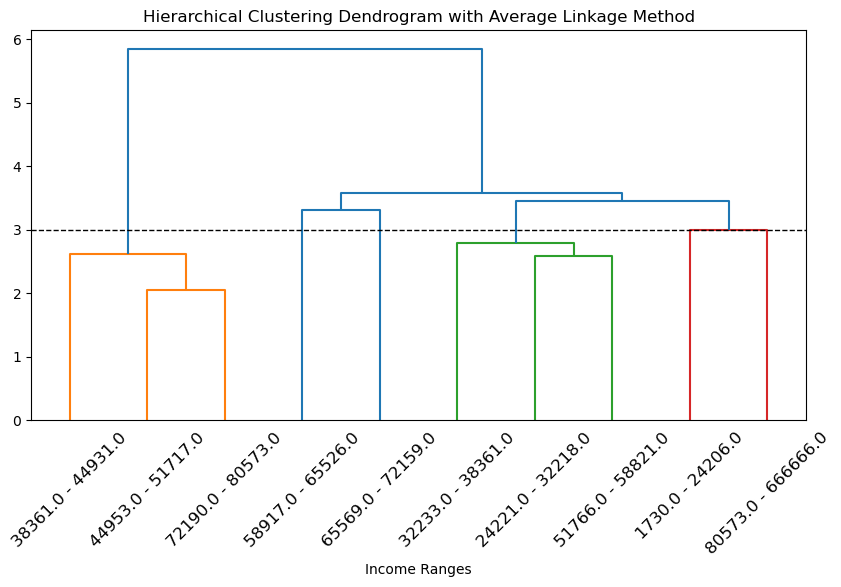

In [32]:
# Develop hierarchical (agglomerative) clustering using average 
# linkage (average distance) for clustering. 
hi_average = linkage(main_df_norm, method='average')

# Develop plot parameters, title and labels.  
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram with Average Linkage Method')
plt.xlabel('Income Ranges')

# Use dendrogram() function to develop hierarchical clustering deondrogram
# clusters with average linkage (average distance). 
# 'color_threshold = 3' represents the threthold of cluster development. 
dendrogram(hi_average, labels=main_df_norm.index, color_threshold= 3)

# Develop the horizontal line representing the cluster development
# threshold (3) and plot the dendrogram.
plt.axhline(y=3, color='black', linewidth=1.0, linestyle='dashed')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True, labelrotation=45)
plt.show()

## Cluster membership,  cluster means, profile plots, and heatmap for clusters with average linkage. 

In [33]:
# Develop cluster membership for agglomerative clustering using average 
# linkage method. The number of clusters is assigned to be 4 as shown
# in the dendrogram with average linkage.  
memb_ave = fcluster(hi_average, 5, criterion='maxclust')
memb_ave = pd.Series(memb_ave, index=main_df_norm.index)

# Display cluster memberships for 5 clusters.  
print('Cluster Membership for 5 Clusters Using Average Linkage Method')
for key, item in memb_ave.groupby(memb_ave):
    print(key, ' : ',' , '.join(item.index))

Cluster Membership for 5 Clusters Using Average Linkage Method
1  :  38361.0 - 44931.0 , 44953.0 - 51717.0 , 72190.0 - 80573.0
2  :  58917.0 - 65526.0
3  :  65569.0 - 72159.0
4  :  24221.0 - 32218.0 , 32233.0 - 38361.0 , 51766.0 - 58821.0
5  :  1730.0 - 24206.0 , 80573.0 - 666666.0


In [34]:
# Identify  and display cluster original mean values 
# for each of 11 input variables (measurements).

# Create data frame with original cluster means for each 
# cluster and each input variable (measurement).
clust_mean = main_df.groupby(memb_ave).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean
# data frame with means and precision of 3 decimals. 
clust_mean['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean.index]

# Use display.precision to reduce the number of decimals to 3. 
pd.set_option('display.precision', 3)

# Display the data frame with mean values and cluster titles.
print('Means of Input Variables for Clusters with Average Linkage Method')
clust_mean

Means of Input Variables for Clusters with Average Linkage Method


,Wine_Expenses,Fruit_Expenses,Meat_Expenses,Fish_Expenses,Sweet_Expenses,Gold_Expenses,Discount_Purchases,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits_Monthly,Cluster
1,73117.000,6444.333,42210.0,9461.667,6728.333,11179.000,501.667,943.333,672.333,1311.667,1138.333,Cluster 1
2,64578.000,6293.000,33367.0,8268.000,5658.000,8863.000,562.000,923.000,554.000,1283.000,1263.000,Cluster 2
3,65451.000,5802.000,37744.0,7644.000,6024.000,8565.000,535.000,938.000,565.000,1348.000,1218.000,Cluster 3
4,68583.333,5495.667,34426.0,7866.667,5925.000,9211.333,515.667,869.000,552.333,1293.333,1212.667,Cluster 4
5,62843.000,5501.000,36474.5,8080.000,5489.500,10005.000,529.500,926.000,585.000,1262.000,1187.500,Cluster 5


In [35]:
# Identify  and display cluster normalized mean values 
# for each of 11 input variables (measurements).

# Create data frame with normalized cluster means for each 
# cluster and each input variable (measurement). 
clust_mean_norm = main_df_norm.groupby(memb_ave).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to the 
# cluster_mean_norm data frame with means and get precision 
# of 3 decimals.
clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]

# Use display.precision to reduce the number of decimals to 3. 
pd.set_option('display.precision', 3)

# Display the data frame with normalized mean values and cluster titles.
print('Normalized Means of Input Variables for Clusters with Average Linkage Method')
clust_mean_norm

Normalized Means of Input Variables for Clusters with Average Linkage Method


,Wine_Expenses,Fruit_Expenses,Meat_Expenses,Fish_Expenses,Sweet_Expenses,Gold_Expenses,Discount_Purchases,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits_Monthly,Cluster
1,1.194,1.127,1.327,1.331,1.212,1.223,-0.819,0.686,1.263,0.498,-1.146,Cluster 1
2,-0.830,0.818,-1.111,-0.174,-0.735,-0.926,1.763,0.194,-0.703,-0.476,1.571,Cluster 2
3,-0.624,-0.183,0.096,-0.960,-0.069,-1.202,0.608,0.557,-0.520,1.733,0.591,Cluster 3
4,0.119,-0.808,-0.819,-0.679,-0.249,-0.602,-0.220,-1.114,-0.730,-0.125,0.474,Cluster 4
5,-1.242,-0.797,-0.254,-0.410,-1.041,0.134,0.372,0.267,-0.188,-1.189,-0.074,Cluster 5


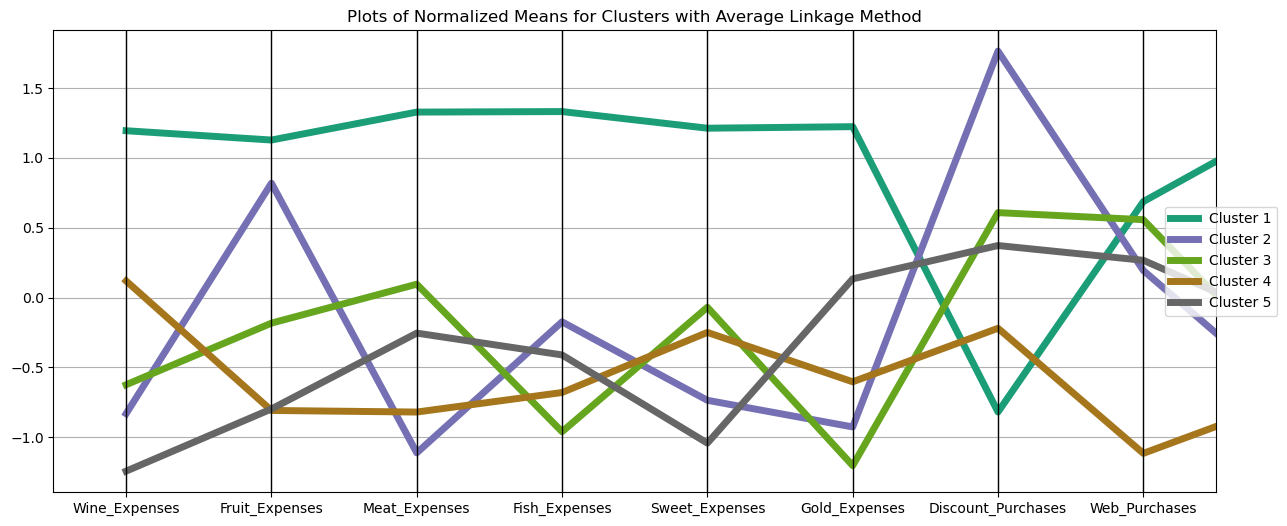

In [36]:
# Display profile plots for normalized means for each cluster and
# each input variable (measurement).
plt.figure(figsize=(15,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Normalized Means for Clusters with Average Linkage Method')
plt.show()


Heatmap for Marketing Hiarachical Clustering with Average Linkage Method


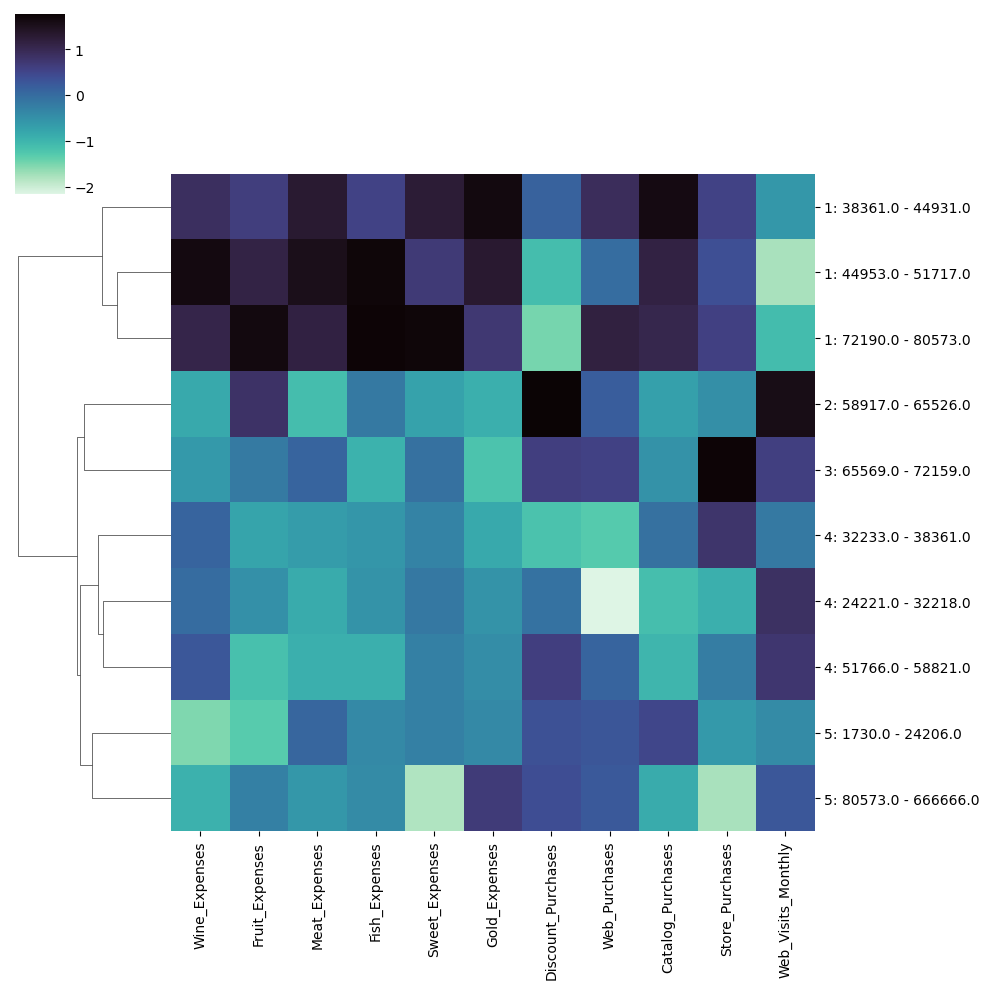

In [37]:
# Create and display heatmap for Marketing hiarachical clustering 
# with average linkage method. 
main_df_norm.index = ['{}: {}'.format(cluster, state) for cluster, 
                           state in zip(memb_ave, main_df_norm.index)]
sns.clustermap(main_df_norm, method='average', col_cluster=False,  
                          cmap="mako_r")
print('Heatmap for Marketing Hiarachical Clustering with Average Linkage Method')
plt.show()

## k-Means clustering of Utilities records into 6 clusters. 

In [17]:
# The conversion of integer data to float 
main_df = main_df.apply(lambda x: x.astype('float64'))

# Normalize the input variables using Pandas sample standard deviation. 
main_df_norm = (main_df - main_df.mean())/main_df.std()

# Use KMeans() function to create k-means clusters with k=6 (n_clusters=6). 
kmeans_6 = KMeans(n_clusters=6, random_state=0, n_init=1).fit(main_df_norm)

# Develop cluster membership for k-means clusters, k=6.
memb_km6 = pd.Series(kmeans_6.labels_, index=main_df_norm.index)

# Display cluster memberships for 6 clusters.  
print('Cluster Membership for 6 Clusters Using k-Means Clustering')
print()
for key, item in memb_km6.groupby(memb_km6):
    print(key, ': ', ', '.join(item.index))

Cluster Membership for 6 Clusters Using k-Means Clustering

0 :  24221.0 - 32218.0, 51766.0 - 58821.0, 65569.0 - 72159.0
1 :  38361.0 - 44931.0, 44953.0 - 51717.0, 72190.0 - 80573.0
2 :  32233.0 - 38361.0
3 :  1730.0 - 24206.0
4 :  80573.0 - 666666.0
5 :  58917.0 - 65526.0


## Cluster centroids, profile plots of centroids, and heatmap for k-means clustering          with k = 6.

In [18]:
# Create data frame with normalized cluster centroids for each 
# cluster and each input variable (measurement). 
centroids = pd.DataFrame(kmeans_6.cluster_centers_, 
                    columns=main_df_norm.columns)

# Add cluster titles (Cluster 1, Cluster 2, ...) to the 
# cluster_mean_norm data frame with means and get precision 
# of 3 decimals.
centroids['Cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
pd.set_option('display.precision', 3)

print('Cluster Centroids for k-Means Clustering with k = 6')
centroids


Cluster Centroids for k-Means Clustering with k = 6


,Wine_Expenses,Fruit_Expenses,Meat_Expenses,Fish_Expenses,Sweet_Expenses,Gold_Expenses,Discount_Purchases,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits_Monthly,Cluster
0,-0.121,-0.610,-0.566,-0.806,-0.169,-0.728,0.379,-0.501,-0.880,0.193,0.729,Cluster 0
1,1.194,1.127,1.327,1.331,1.212,1.223,-0.819,0.686,1.263,0.498,-1.146,Cluster 1
2,0.097,-0.776,-0.662,-0.578,-0.309,-0.825,-1.190,-1.284,-0.071,0.781,-0.172,Cluster 2
3,-1.541,-1.309,0.077,-0.408,-0.278,-0.400,0.351,0.291,0.493,-0.612,-0.412,Cluster 3
4,-0.943,-0.285,-0.586,-0.413,-1.804,0.667,0.394,0.242,-0.869,-1.767,0.264,Cluster 4
5,-0.830,0.818,-1.111,-0.174,-0.735,-0.926,1.763,0.194,-0.703,-0.476,1.571,Cluster 5


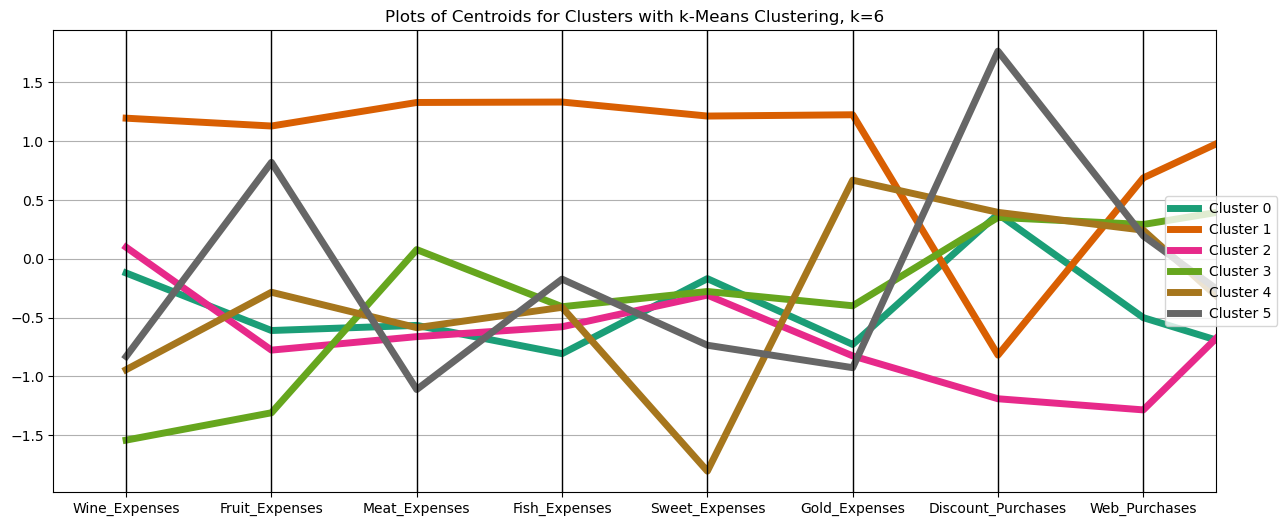

In [19]:
# Display profile plots for normalized means for each cluster and
# each input variable (measurement).
plt.figure(figsize=(15,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='Cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Centroids for Clusters with k-Means Clustering, k=6')
plt.show()

Heatmap for k-Means Clustering with 6 Clusters


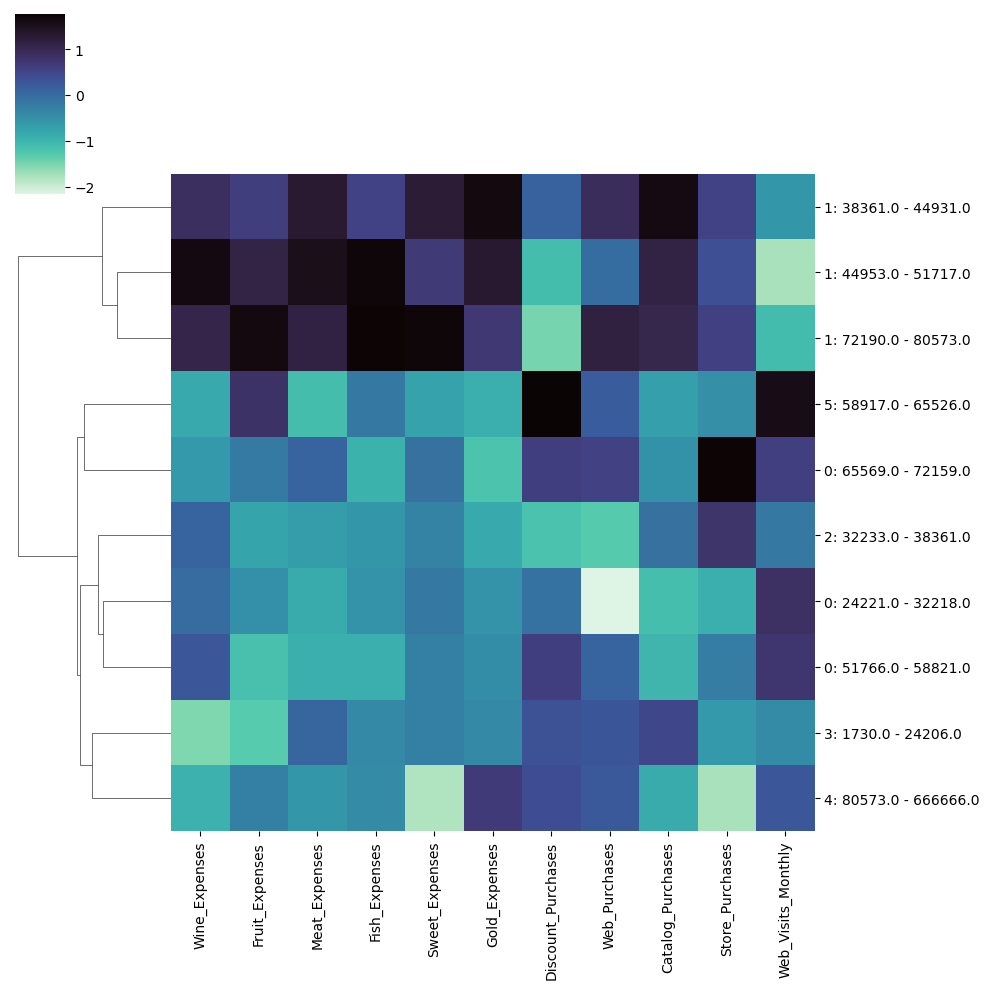

In [20]:
# Create and display heatmap for Marketing k-mean clustering 
# with centroid method. 
main_df_norm.index = ['{}: {}'.format(cluster, state) for cluster, 
                           state in zip(memb_km6, main_df_norm.index)]
sns.clustermap(main_df_norm,  col_cluster=False,  
                          cmap="mako_r")
print('Heatmap for k-Means Clustering with 6 Clusters')
plt.show()

## Elbow Chart

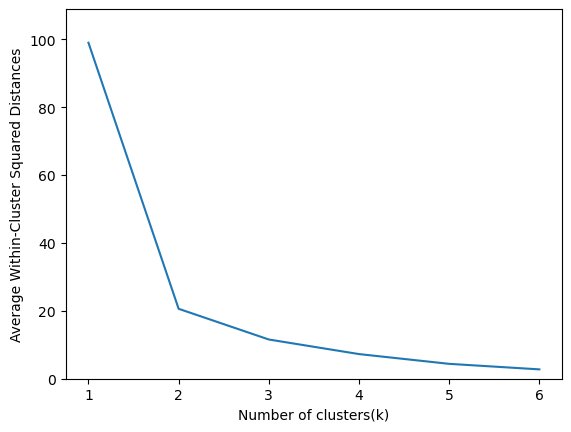

In [39]:
# Identify average with-cluster squred distances for k-Means clusters, number of clusters k varies from 1 to 7. 
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=1).fit(main_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})

# Develop and display Elbow chart to compare average within-cluster squared distances
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()